In [1]:
%matplotlib notebook

In [90]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import numpy as np
import pandas as pd

import json

In [4]:
id = 1

df = pd.read_csv(f'data/patrolling_positions.csv')
df.head()

,Unnamed: 0,uav1_x,uav1_y,uav1_z,uav2_x,uav2_y,uav2_z,uav3_x,uav3_y,uav3_z,...,uav6_z,uav7_x,uav7_y,uav7_z,uav8_x,uav8_y,uav8_z,uav9_x,uav9_y,uav9_z
0,22,-1.078069,-1.108264,29.717033,10.724186,-0.754450,29.930861,7.481122,7.500985,29.964983,...,30.046406,-7.108722,-7.083209,30.307589,-0.026359,-10.010536,30.066213,7.037169,-7.086782,30.059488
1,23,-1.159335,-1.196757,29.701918,10.828481,-0.855741,29.920523,7.514406,7.534611,29.959574,...,30.044062,-7.108711,-7.083525,30.317465,-0.026716,-10.010662,30.067191,7.036528,-7.086659,30.060066
2,24,-2.705324,-2.598160,29.674079,13.759730,-3.544195,29.778025,9.979961,10.108236,29.817517,...,29.916267,-7.616125,-7.603854,31.547899,-0.824300,-10.885607,29.979761,7.812205,-7.845072,29.983487
3,25,-4.442585,-4.309179,29.670880,17.006716,-5.726659,29.834011,13.357230,13.484742,29.762117,...,29.795911,-8.746148,-8.712373,32.790198,-1.732259,-13.835604,29.868182,9.248255,-10.713633,29.849972
4,26,-7.540972,-7.068723,29.596852,19.249682,-7.457739,29.976257,15.674782,15.594533,29.943611,...,29.892595,-10.176415,-10.217727,32.830247,-2.663718,-18.298144,29.865600,10.324194,-15.125108,29.893638


In [104]:
def clear_data(data):
    
    dict_data = {}
    size = 0
    
    cortes = [12, 16, 16, 14, 32, 30, 43, 30, 32]
    
    for i in range(9):
        id = i+1
        x = data[f'uav{id}_x']
        y = data[f'uav{id}_y']
        z = data[f'uav{id}_z']
        
        dict_data[f'uav{id}_x'] = list(x[cortes[i]:])
        dict_data[f'uav{id}_y'] = list(y[cortes[i]:])
        dict_data[f'uav{id}_z'] = list(z[cortes[i]:])
        
        size = max(size, len(dict_data[f'uav{id}_x']))
        
    for i in range(9):
        id = i+1
        s = len(dict_data[f'uav{id}_x'])
        
        for _ in range(size-s):
            dict_data[f'uav{id}_x'].append(dict_data[f'uav{id}_x'][-1])
            dict_data[f'uav{id}_y'].append(dict_data[f'uav{id}_y'][-1])
            dict_data[f'uav{id}_z'].append(dict_data[f'uav{id}_z'][-1])
        
    cleared_data = pd.DataFrame(dict_data, index=range(size))
    
    return cleared_data

In [106]:
creared_data = clear_data(df)

creared_data.head()

,uav1_x,uav1_y,uav1_z,uav2_x,uav2_y,uav2_z,uav3_x,uav3_y,uav3_z,uav4_x,...,uav6_z,uav7_x,uav7_y,uav7_z,uav8_x,uav8_y,uav8_z,uav9_x,uav9_y,uav9_z
0,-23.331357,-21.038105,29.866383,41.057481,-19.722053,29.953888,40.991941,46.028041,29.941332,-25.143788,...,29.990256,-90.811645,-89.938712,30.051494,-24.297017,-88.857482,30.018119,40.022369,-89.064451,30.031800
1,-25.339884,-21.825842,30.066385,41.013830,-16.833207,29.953109,41.049132,50.084194,30.013239,-25.024999,...,30.056529,-91.046186,-88.443204,30.031189,-25.056673,-89.541301,30.118154,40.875205,-89.684262,30.094037
2,-25.126304,-20.275012,30.071951,41.020741,-13.798436,30.002868,41.001629,54.619765,30.004929,-25.056941,...,30.032193,-91.145963,-85.649115,29.957184,-25.061146,-88.032436,30.054039,40.965226,-88.163518,30.031573
3,-25.154326,-17.682163,29.990427,41.032484,-11.308346,30.015752,41.029609,58.668251,30.000119,-25.047278,...,30.001753,-91.045504,-82.658064,29.962789,-25.039765,-85.622644,29.978508,41.004934,-85.709301,29.949738
4,-24.971626,-14.934652,29.967522,41.019430,-8.456300,29.992750,41.019807,62.692930,30.028466,-25.046658,...,29.975422,-91.046655,-79.860137,30.005002,-25.031895,-82.727718,29.935064,41.010005,-82.763225,29.935921


<IPython.core.display.Javascript object>


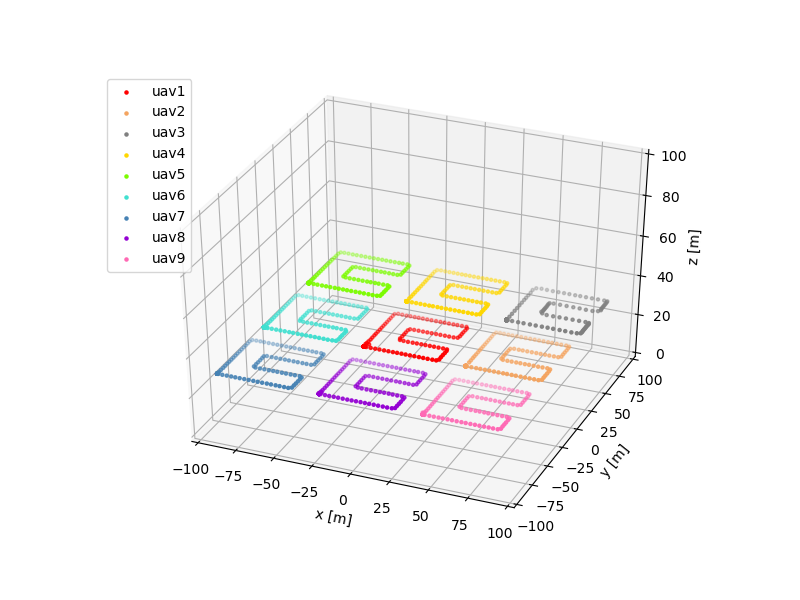

In [110]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'sandybrown', 'grey', 'gold', 'lawngreen', 'turquoise', 'steelblue', 'darkviolet', 'hotpink']
for i in range(9):
    id = i+1
    pts = ax.scatter(creared_data[f'uav{id}_x'], creared_data[f'uav{id}_y'], creared_data[f'uav{id}_z'], marker='.', c=colors[i], label=f'uav{id}')

ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z [m]')

ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)
ax.set_zlim(0, 100)

ax.legend(loc=2)
plt.show()

<IPython.core.display.Javascript object>


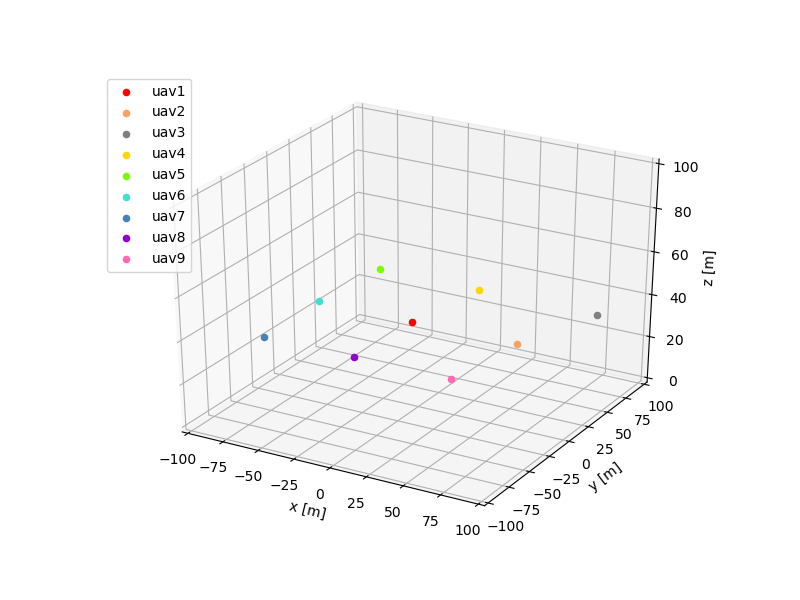

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [109]:
def update_scatter(num, data, scatters):
    for i, scatter in enumerate(scatters):
        id = i+1
        scatter._offsets3d = (data[f'uav{id}_x'][num:num+1], data[f'uav{id}_y'][num:num+1], data[f'uav{id}_z'][num:num+1])
    return scatters

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'sandybrown', 'grey', 'gold', 'lawngreen', 'turquoise', 'steelblue', 'darkviolet', 'hotpink']
scatters = [ax.scatter(creared_data[f'uav{id}_x'][0], creared_data[f'uav{id}_y'][0], creared_data[f'uav{id}_z'][0], s=80, marker='.', c=colors[id-1], label=f'uav{id}') for id in range(1,10)]

ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z [m]')

ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)
ax.set_zlim(0, 100)

ani = animation.FuncAnimation(fig, update_scatter, len(creared_data.index), fargs=(creared_data, scatters), interval=100, blit=False, repeat=True)

ax.legend(loc=2)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800, extra_args=['-vcodec', 'libx264'])
ani.save('videos/patrolling_moviment.mp4', writer=writer)

ani.save('videos/patrolling_moviment.gif', writer='imagemagick', fps=15)

plt.show()